In [1]:
# This script tries to approximate the cost of Google's DenseMap

import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math
import numpy as np
from scipy import optimize
from sklearn.metrics import r2_score

figsize=(4.5, 3)

AnonBlue='#3070b3'
AnonGreen='#a2ad00'
AnonOrange='#e37222'

PATH = "../../paper/graphs"

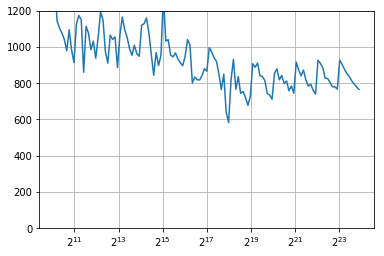

In [2]:
# Just plot the data
data = pd.read_csv("../data-files/denseMap.csv")
setupMean = data.groupby(['size'])['setup'].mean()
runMean = data.groupby(['size'])['run'].mean()
steps = data['size'].unique()

plt.semilogx(basex=2)
plt.ylim([0,1200])

plt.plot(steps, setupMean)

plt.grid(b=True)

plt.show()

In [3]:
# This function models the insertion cost
def setupfun(x):
    return (650 + math.log(x,1.2)) + 170* (((np.sum([2**i for i in range(2, math.floor(math.log(x,2)))])/ x) -0.5) *2)

# This function models the query cost
def runfun_fit(x,t,o):
    # This is the actual mathematical function
    def runner(a):
        return math.log(a,t) + o
    # Magic in case curve_fit hands us an array
    if isinstance(x, np.ndarray):
        ret = []
        for s in x:
            ret += [runner(s)]
        return ret
    else:
        return runner(x)



In [4]:
#x = np.arange(2**10-1,2**17, 16)
# Calculate the functions
y = [setupfun(i) for i in steps]

r2 = r2_score(setupMean, y) 
print("R2 score (setup): " + str(r2))

#params = [1.02,2**11,600]
# Try to fit the data
mins=[1.01, 0]
maxs=[1.1, 1000]
params, _ = optimize.curve_fit(runfun_fit, steps, runMean, bounds=(mins,maxs))
print(params)
fit = []
for s in steps:
    fit += [runfun_fit(s,params[0],params[1])]

r2 = r2_score(runMean, fit) 
print("R2 score (run): " + str(r2))
    
fig = plt.figure(figsize=figsize, dpi=300)

plt.semilogx(basex=2)
plt.ylim([0,1200])

# Plot the data
plt.plot(steps,y, label="fit-setup", color=AnonOrange, linewidth=2, linestyle='--', dashes=(5, 1))
plt.plot(steps, setupMean, label="data-setup", color=AnonBlue, linewidth=2)
plt.plot(steps, fit, label="fit-run", color=AnonOrange, linewidth=2, linestyle='--', dashes=(5, 1))
plt.plot(steps, runMean, label="data-run", color=AnonBlue, linewidth=2)
plt.legend(bbox_to_anchor=(1, 1))
plt.ylabel("Cycles per Operation")
plt.xlabel("\#Operations")
plt.grid(b=True)

#plt.savefig('output/synth-denseMap.pdf',bbox_inches='tight')
#plt.show()

from matplotlib2tikz import save as tikz_save
tikz_save(PATH + '/denseMap.tex',
          figureheight='3.5cm',
          figurewidth='.9\\columnwidth',
          extra_axis_parameters = {"mark options={scale=.15}",
                                   "legend style={at={(0.5,1.1)}, draw=white!80.0!black, anchor=south}",
                                   "legend columns = 2"}
         )

R2 score (setup): -0.8006968763676094
[  1.0888403  104.22373547]
R2 score (run): 0.6186670905187676
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter
